In [1]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2


print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [ ]:
casestore = read_file("a1.pkl")

b2-2dplots.pkl loaded


In [2]:
db = CaseDB()

toload = [
    # dict(name="base", id="c3c-1.383e6", grid="g3b2-fatter_newhypno.nc"),
    # dict(name="puff", id="c7a-c4e_aa_fix", grid="g3b2-fatter_newhypno.nc"),
    # dict(name="puff, Tn=30eV", id="c8a-c7a_Tn30eV_sol", grid="g3b2-fatter_newhypno.nc"),
    dict(name="sources", id="d2a-d1a_aa_fix", grid="g3b2-fatter_newhypno.nc"),
    # dict(name="sources, Tn=30eV", id="d3a-d2b_Tn30eV_sol", grid="g3b2-fatter_newhypno.nc"),
    dict(name="src_pfix", id="d4a-d2b_fix_psrc", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True)
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],double_load = False, keep_xboundaries = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.930E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 4.353E+07 [m3]


In [ ]:
ds = casestore["src_pfix"].ds.isel(t=-1)


v = viewer_2d(
    "Td",
    {
        "src_pfix"  : {"code":"hermes", "ds" : ds},
        # "Tn = 30eV" : {"code":"hermes", "ds" : caseng.ds.isel(t=-1)}
    },
    logscale = True,
    vmin = 10,
    vmax = 1000,
)

In [10]:
%matplotlib widget

In [4]:
write_file(casestore, "a1.pkl")

a1.pkl written


Tn=neumann : 3.39e+01
Tn=30eV : 3.39e+01
Tn=neumann : 3.39e+01
Tn=30eV : 3.39e+01
Tn=neumann : 3.39e+01
Tn=30eV : 3.39e+01


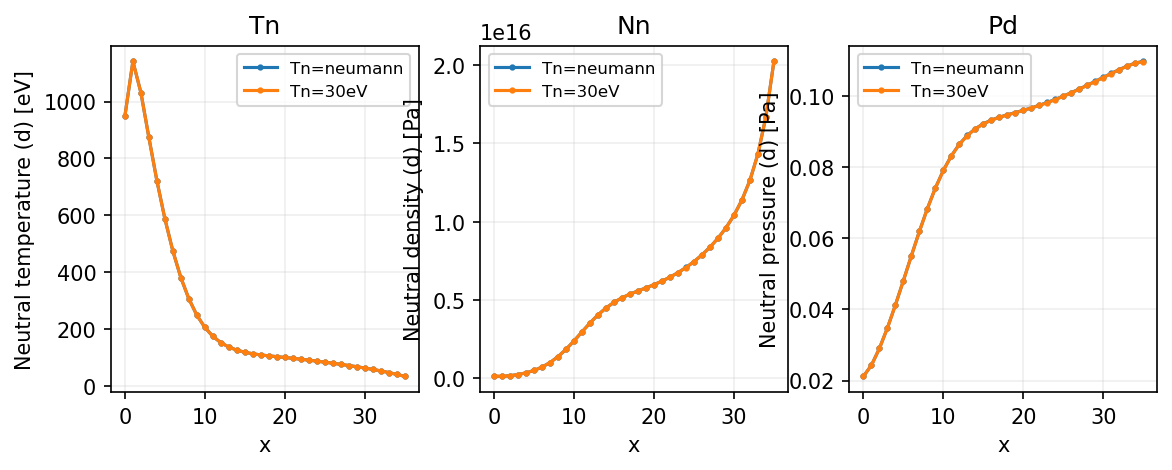

In [14]:
plt.close("all")

datasets = {"Tn=neumann":caseng.ds.isel(t=-10), "Tn=30eV":caseng.ds.isel(t=-1)}

fig, axes = plt.subplots(1,3, figsize=(9,3), dpi = 150)

ax = axes[0]
for name in datasets.keys():
    ds = datasets[name].hermesm.select_region("inner_midplane_a")
    ds["Td"].plot(ax = ax, marker = "o", label = name, ms = 2)
    ax.set_title("Tn")
    print(f"{name} : {ds['Td'][-1]:.2e}")
    
ax = axes[1]
for name in datasets.keys():
    ds = datasets[name].hermesm.select_region("inner_midplane_a")
    ds["Nd"].plot(ax = ax, marker = "o", label = name, ms = 2)
    print(f"{name} : {ds['Td'][-1]:.2e}")
    ax.set_title("Nn")
    
ax = axes[2]
for name in datasets.keys():
    ds = datasets[name].hermesm.select_region("inner_midplane_a")
    ds["Pd"].plot(ax = ax, marker = "o", label = name, ms = 2)
    print(f"{name} : {ds['Td'][-1]:.2e}")
    ax.set_title("Pd")
    
for ax in axes:
    ax.grid(which="both", alpha = 0.2)
# ax.set_ylim(0,100)
    ax.legend(fontsize = 8)
    ax.set_yscale("linear")

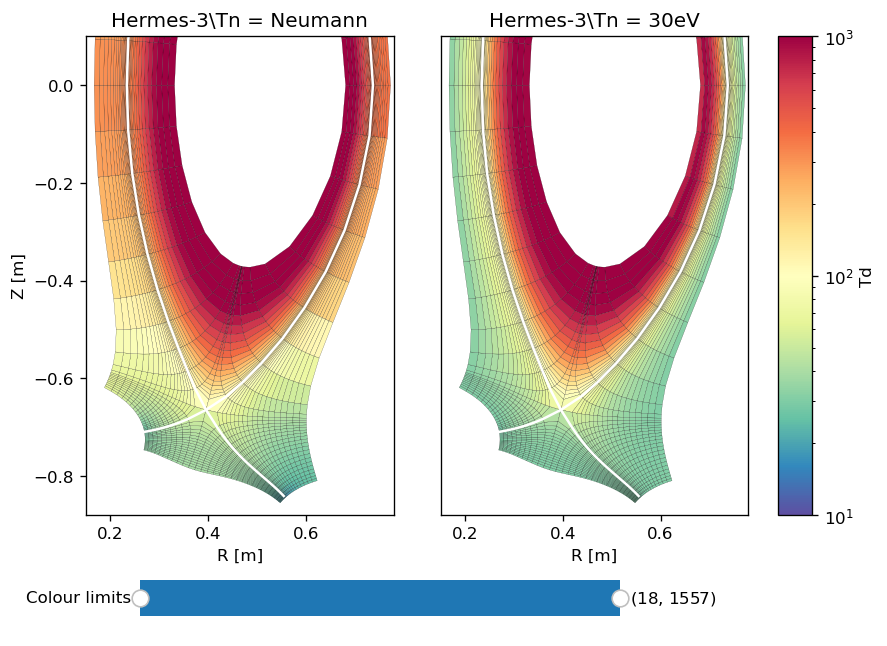

In [21]:
v = viewer_2d(
    "Td",
    {
        "Tn = Neumann"  : {"code":"hermes", "ds" : caseng.ds.isel(t=0)},
        "Tn = 30eV" : {"code":"hermes", "ds" : caseng.ds.isel(t=-1)}
    },
    logscale = True,
    vmin = 10,
    vmax = 1000,
)

In [6]:
datasets = dict()
for case in toload:
    datasets[case["name"]] = casestore[case["name"]].ds.isel(t=-1)

In [14]:
datasets = {
    "Tn = Neumann" : caseng.ds.isel(t=0),
    "Tn = 30eV" : caseng.ds.isel(t=-1)}

In [7]:
soledge = SOLEDGEdata()
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\plot1d_no_curr.csv", mode = "plot1d_omp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\2023-02-21 - IMP profiles\plot1d_hfs_meters.csv", mode = "plot1d_imp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\wall_ntmpi_no_curr.csv", mode = "wall_ntmpi")

soledge_currents = SOLEDGEdata()
soledge_currents.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\plot1d_curr.csv", mode = "plot1d")
soledge_currents.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\wall_ntmpi_curr.csv", mode = "wall_ntmpi")


solps = dict()
solps["base"] = SOLPSdata()
solps["base"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF")

solps["noiz_core"] = SOLPSdata()
solps["noiz_core"].read_last10s(r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16")


hermes = dict()
for hermes_case in datasets.keys():
    hermes[hermes_case] = Hermesdata()
    hermes[hermes_case].read_case(datasets[hermes_case])


C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF\last10s.pkl loaded
C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded


In [9]:
datasets.keys()

dict_keys(['base', 'puff', 'puff, Tn=30eV', 'sources', 'sources, Tn=30eV'])

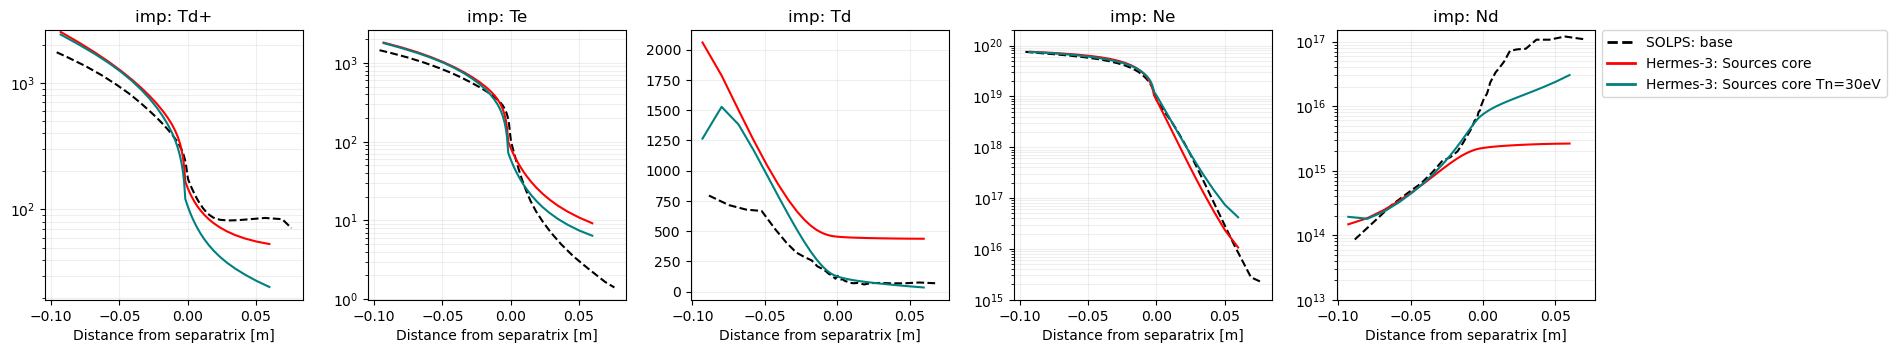

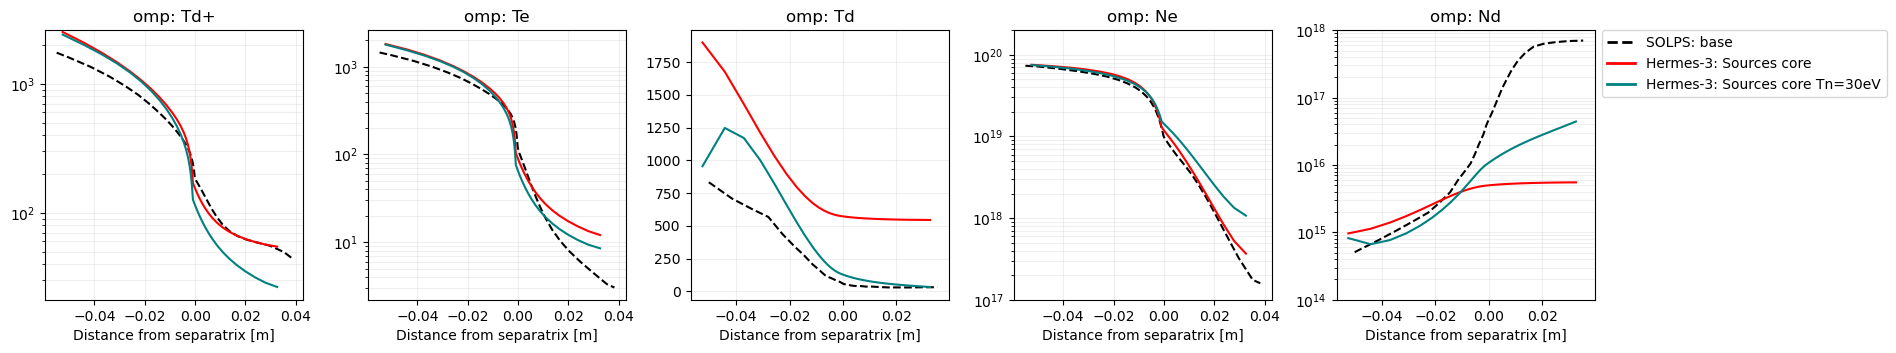

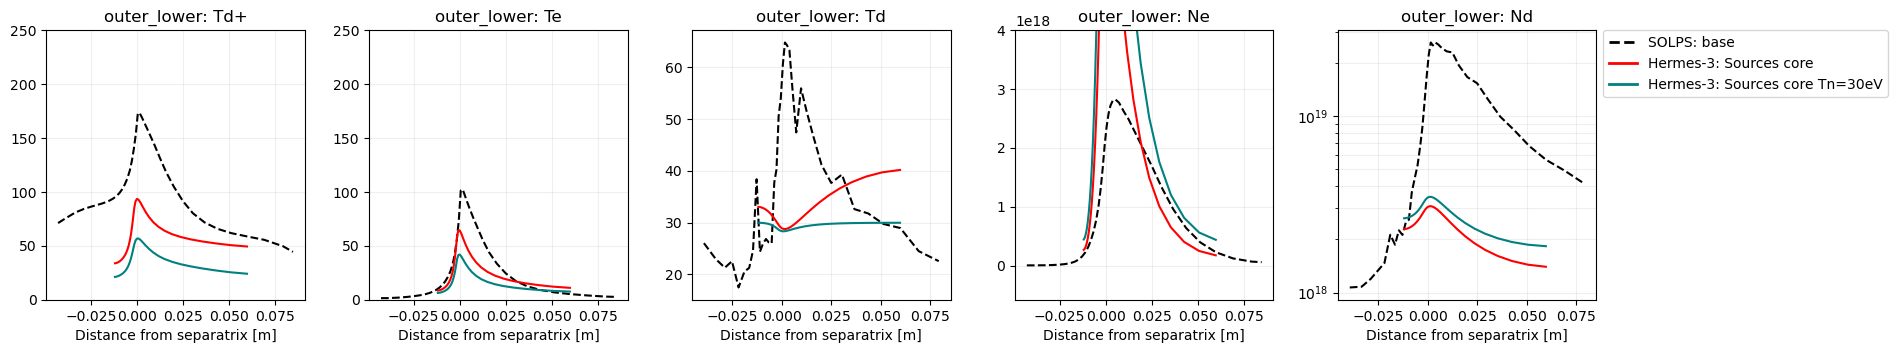

In [17]:
lineplot(
    cases = { 
    "SOLPS: base" : solps["base"],
    # "SOLPS: noiz core" : solps["noiz_core"],
    # "SOLEDGE2D": soledge, 
    # "Hermes-3: Tn Neumann": hermes["Tn = Neumann"], 
    # "Hermes-3: Tn = 30eV": hermes["Tn = 30eV"], 
    # "Hermes-3: Dirichlet core": hermes["puff"], 
    "Hermes-3: Sources core": hermes['sources'], 
    "Hermes-3: Sources core Tn=30eV": hermes['sources, Tn=30eV'], 
    # "Hermes-3: Puff": hermes_puff
    # "SOLEDGE2D curr": soledge_currents
         },
    colors = ["black", "red", "teal", "darkorange", "red"],
    params = ["Td+", "Te", "Td", "Ne", "Nd"],
    mode = "log",
    dpi = 100
)

{'xlim': (None, None), 'ylim': (None, None), 'figure_aspect': 0.9, 'wspace_modifier': 1, 'view': None, 'dpi': 100}


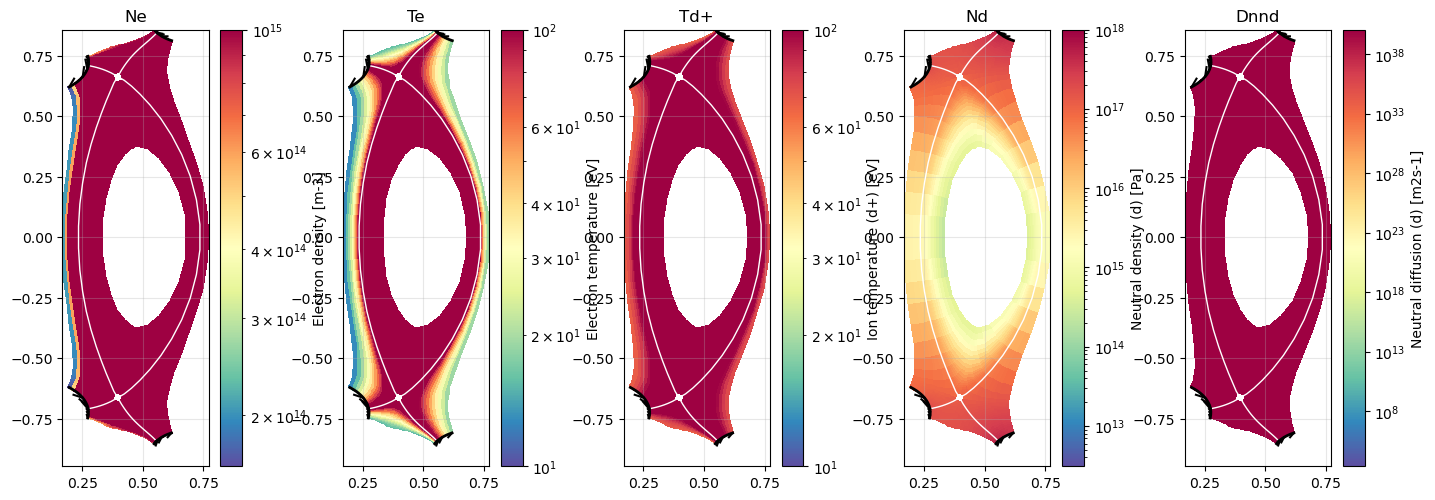

In [3]:
self = Monitor2D(caseng, mode = "pcolor", windows = [["Ne", "Te", "Td+", "Nd", "Dnnd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Ne":{"vmin":None, "vmax":1e15},
                    "Te":{"log":True, "vmin":10, "vmax":100},
                    "Td+":{"log":True, "vmin":10, "vmax":100},
                    "Nd":{"vmin":None, "vmax":1e18,
                    }})